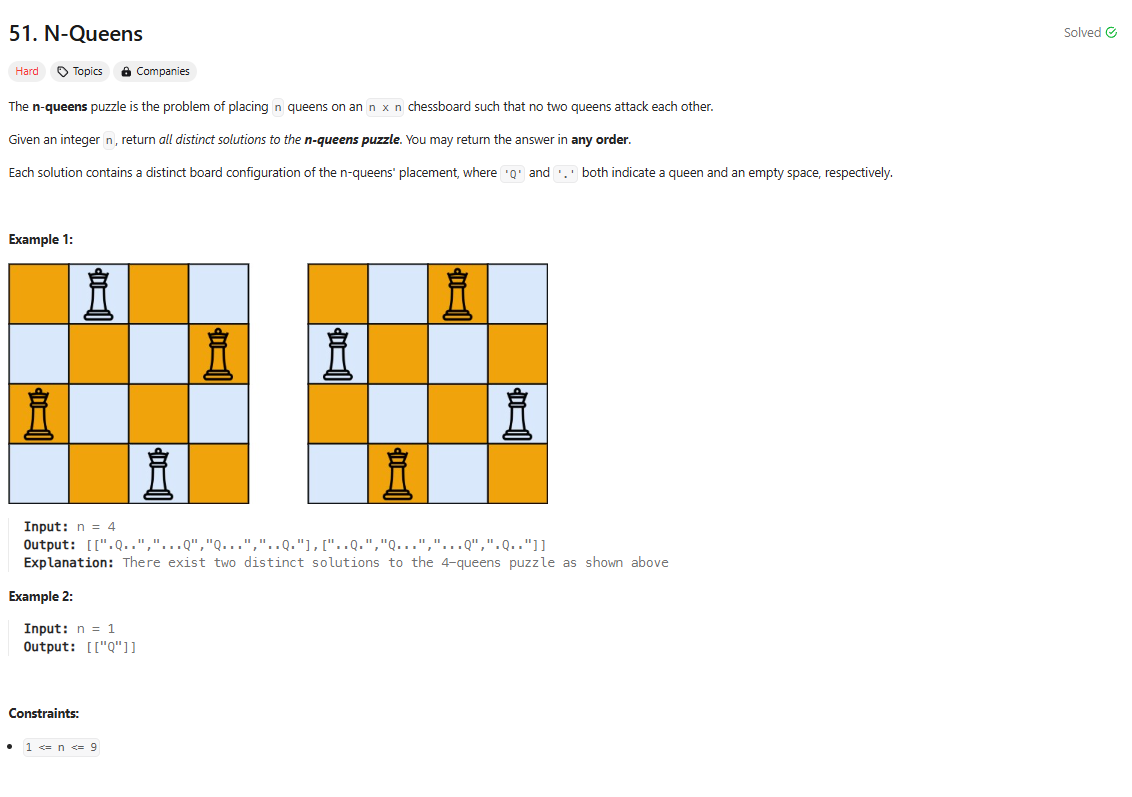

In [ ]:
# Solution 1 (Backtracking)
# Time: O(n!)
# memory: 

class Solution:
    def solveNQueens(self, n: int) -> List[List[str]]:
        def dfs(row, board):
            if row == n:
                result.append(["".join(r) for r in board])
                return

            for col in range(n):
                if col in cols or (row + col) in posDiag or (row - col) in negDiag:
                    continue

                board[row][col] = 'Q'
                cols.add(col)
                posDiag.add(row + col)
                negDiag.add(row - col)

                dfs(row + 1, board)

                board[row][col] = '.'
                cols.remove(col)
                posDiag.remove(row + col)
                negDiag.remove(row - col)

        result = []
        cols, posDiag, negDiag = set(), set(), set()
        board = [["."] * n for _ in range(n)]
        dfs(0, board)
        return result

In [ ]:
# Solution 2 (Backtracking + utilizing a bit of symmetry)
# Time: O(n!)
class Solution:
    def solveNQueens(self, n: int) -> List[List[str]]:
        if n == 1:
            return [['Q']]

        col, posDiag, negDiag = set(), set(), set()
        result = []

        def dfs(board):
            nonlocal col, posDiag, negDiag, result
            i = len(board)
            if i == n:
                result.append(board[:])
                if n%2 == 1 and board[0][n//2] == 'Q':
                    return
                result.append([s[::-1] for s in board])
            
            if i == 0:
                for j in range((n+1)//2):
                    tempRow = ['.'] * n
                    tempRow[j] = 'Q'
                    board.append("".join(tempRow))
                    col.add(j); posDiag.add(i+j); negDiag.add(i-j)
                    dfs(board)
                    board.pop()
                    col.remove(j); posDiag.remove(i+j); negDiag.remove(i-j)

            else:
                for j in range(n):
                    if j not in col and (i+j) not in posDiag and (i-j) not in negDiag:
                        tempRow = ['.'] * n
                        tempRow[j] = 'Q'
                        board.append("".join(tempRow))
                        col.add(j); posDiag.add(i+j); negDiag.add(i-j)
                        dfs(board)
                        board.pop()
                        col.remove(j); posDiag.remove(i+j); negDiag.remove(i-j)
            
        dfs([])
        return result